# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## Model Development: Training Only


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudyModel.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">October 24rd, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

    
- [x] $\textit{mutation effect label}$ prediction using Random Forest algorithm.
    

- [x] Classification will be $\textit{Disrupting vs (No effect + Increasing)}$.
    > $\textit{Disrupting} → 0$\
    > $\textit{No effect + Increasing} → 1$\
    > $\textit{Decreasing} → \textit{ignored}$
    
    
- [x] Evaluate the performane of the model.
    
- [x] We use SHAP in feature selection
     
- [x] We measure the impact of randomization by repeating whole experiment with multiple runs. 
    
- [x] We use Predator object to conduct experiments.
    
**Dependent files:**
* Training (mutations) data:
    - *training_data_M1.txt*

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)
from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

NUM_EXPERIMENT_REPEAT = 50 # 10, 25, 50

SEED = 42
random.seed(SEED)

# Generate random integers as many as num_experiment.
random_seeds = random.sample(range(1, 99999), NUM_EXPERIMENT_REPEAT)

# PATHS
PROJECT_COMMON_FILE_DIR = "../data/"
MUTATIONS_PATH = "training_data_M1.txt"
INITIAL_COLUMNS_PATH = "../data/initial_columns_59.csv"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [2]:
from Predator import Predator

In [3]:
predator = Predator(
    project_common_file_dir=PROJECT_COMMON_FILE_DIR, 
    mutations_path=MUTATIONS_PATH, 
    initial_columns_path=INITIAL_COLUMNS_PATH, 
    n_experiment=NUM_EXPERIMENT_REPEAT,
    eliminate_models=True,
    random_seeds=random_seeds
)

2021-10-23 20:54:14 | DEBUG    | Predator | Initializing Predator ..
2021-10-23 20:54:14 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `train_data` ..
2021-10-23 20:54:14 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `train_data_processed` ..


## Datasets

### Original Datasets

#### 1. Training Data: Mutations

In [4]:
display_data(predator.data_materials["train_data"])

Data dimensions: (1101, 104)


,Mutation_Effect_Label,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
1,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
2,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627


### Processed Datasets

#### 1. Preprocessed Training Data 

In [5]:
display_data(predator.data_materials["train_data_processed"])

Data dimensions: (740, 62)


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.21970,-0.092273,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,0,P01116,Y40C,P50749,0.9277,0.931315,0.3553,0.172500,2.07695,0.998749,...,329.0,47.61770,47.21160,70.2902,70.2461,464.470,400.030,864.505,3.07827,3.59123
2,0,Q96QK1,F534D,Q9UBQ0,1.0000,0.360743,1.0000,0.994505,2.69571,0.288297,...,453.0,68.21080,68.19710,59.2321,59.1774,510.690,298.820,809.510,3.03938,3.24435


Label counts:
Disrupting                540
Increasing + No Effect    200
Name: Mutation_Effect_Label, dtype: int64


,Mutation_Effect_Label,Counts
Disrupting,0,540
Increasing + No Effect,1,200


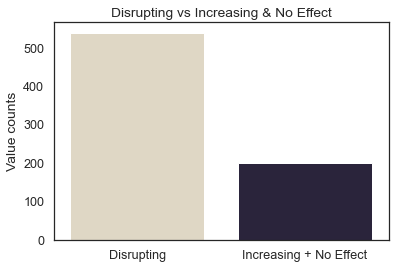

In [6]:
visualize_label_counts(predator.data_materials["train_data_processed"])
display_label_counts(predator.data_materials["train_data_processed"])

## Data Sampling with Unique Proteins

In [7]:
predator.sample_spsm()

2021-10-23 20:54:15 | DEBUG    | Predator | sampling ..


  0%|          | 0/50 [00:00<?, ?it/s]

In [8]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'sampled_train_data_list'])

In [9]:
display_data(predator.data_materials["sampled_train_data_list"][0], head_row=5)

Data dimensions: (164, 62)


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.219700,-0.092273,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,0,P01116,E37G,P50749,0.9277,0.931315,0.3553,0.172500,2.470580,0.999487,...,329.0,45.03130,44.51690,70.2449,70.2449,464.470,400.030,864.505,2.63614,3.21798
2,0,Q96QK1,Q586A,Q9UBQ0-2,1.0000,0.360743,1.0000,0.973118,1.697280,0.836538,...,453.0,68.21070,68.21080,59.2629,59.2629,510.690,298.820,809.510,2.93412,4.81473
3,0,O43521-3,G66A,P10415-2,1.0000,0.714286,0.6505,0.435452,0.945436,-0.082937,...,181.0,2.67195,2.73996,31.6189,31.6189,421.875,272.215,694.090,3.41921,3.20397
4,1,Q13418,Q362H,Q9NVD7,0.9925,0.971054,1.0000,0.961240,0.621791,0.206189,...,391.0,60.07690,60.06430,33.8017,33.8017,406.135,174.195,580.330,3.39874,3.39874


In [10]:
# Number of sampled train data
len(predator.data_materials["sampled_train_data_list"])

50

### Label Distributions in Training Data

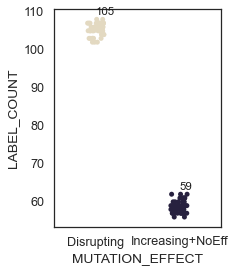

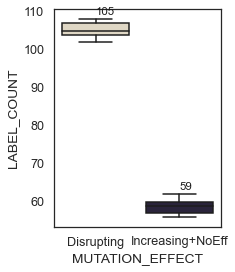

In [11]:
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='strip')
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='box')

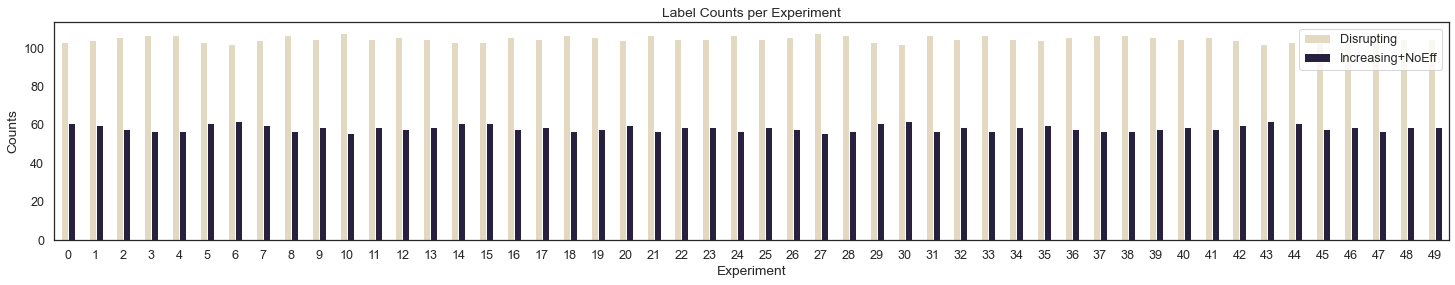

In [12]:
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='bar')

## Preparing the Train Data Materials for Machine Learning Algorithms

In [13]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'sampled_train_data_list'])

In [14]:
predator.data_materials.prepare_model_data_materials()  # it will initialize Xs etc. too

2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | preparing datasets for ML ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Initializing model datasets ..


  0%|          | 0/50 [00:00<?, ?it/s]

2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-10-23 20:54:29 | DEBUG    | helpers.helpers_predator.data_materials 

In [15]:
print(len(predator.data_materials["Xs"]))
predator.data_materials["Xs"][0].head()

50


,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score,Model/DOPE_score,Provean_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,1.000000,0.948980,1.0000,0.306767,-0.38786,0.995137,0.594040,2.204959,-0.444294,-5.785,...,309.0,21.2713,20.8506,32.48860,32.48860,1159.70,952.745,2112.450,3.00752,4.27950
1,0.677800,0.664382,0.5222,0.517348,1.34736,0.389287,0.276097,2.264306,-1.820240,-5.819,...,188.0,26.6920,26.6217,17.20170,17.20170,667.92,288.795,956.720,3.51062,3.45116
2,0.333300,0.288192,0.9507,0.943866,1.76213,0.982242,0.020935,2.364912,0.177327,-10.467,...,409.0,399.4770,399.6150,49.65870,49.65870,0.00,0.000,0.000,3.39677,3.57761
3,0.683200,0.629376,1.0000,0.508475,4.30466,0.987585,0.907073,1.488382,-0.624092,-5.311,...,292.0,80.0940,80.8401,2.20488,2.20488,367.49,187.965,555.455,4.53101,4.05405
4,0.991667,0.892083,1.0000,0.891262,1.16345,0.994134,0.010976,2.027475,-0.421525,-5.741,...,222.0,22.6326,22.5082,32.91710,32.91710,1167.28,460.855,1628.150,5.08779,5.08779


## Initial Insights

For each experiment, the models are fitted with 80% of training data and predictions are made for the remaining 20%. Then performance is evaluated comparing predictions with groundtruth labels.

In [16]:
predator.run_evaluate_valid(models_type='default')

2021-10-23 20:54:30 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2021-10-23 20:54:30 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with default models.


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6190
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6364
Balanced accuracy score : 0.6071
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7576
Balanced accuracy score : 0.7024
-------- EXPERIMENT:  4 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7879
Balanced accuracy score : 0.6818
-------- EXPERIMENT:  5 --------
X_train.shape=(131, 58), y_trai

In [17]:
from helpers.helpers_predator.visualizers import visualize_accuracy_metrics

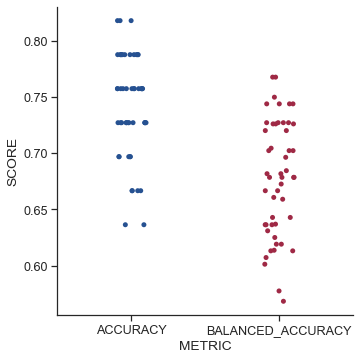

In [18]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["initial_scoring"]["acc_scores"], 
    predator.eval_valid.scores["initial_scoring"]["balan_acc_scores"],
    kind='strip'
)

## SHAP Feature Importance Ranking

In [19]:
shap_top_ns = [5, 10, 20, 30, 40]

In [20]:
predator.init_shap_feature_selector(shap_top_ns)

2021-10-23 20:54:41 | DEBUG    | helpers.helpers_predator.feature_selection | Initializing ShapFeatureSelector ..


2021-10-23 20:54:41 | DEBUG    | helpers.helpers_predator.feature_selection | Loading ShapFeatureSelector ..


  0%|          | 0/50 [00:00<?, ?it/s]

 === SELECTED FEATURES === 
 --- SHAP TOP 5 ---
Experiment 1
['Final_ddG', 'Provean_score', 'EL2_score', 'Solvent_accessibility_mut', 'Interactor_alignment_score']

Experiment 2
['Provean_score', 'Final_ddG', 'Solvent_accessibility_mut', 'EL2_score', 'Interactor_alignment_score']

Experiment 3
['Provean_score', 'EL2_score', 'Solvent_accessibility_wt', 'Final_ddG', 'Matrix_score']

Experiment 4
['EL2_score', 'Provean_score', 'Final_ddG', 'ProteinSolver_score', 'Interactor_alignment_score']

Experiment 5
['EL2_score', 'Final_ddG', 'solvation_polar_wt', 'Provean_score', 'solvation_polar_mut']

Experiment 6
['Provean_score', 'Final_ddG', 'EL2_score', 'Matrix_score', 'pcv_vdW_wt']

Experiment 7
['Provean_score', 'EL2_score', 'Final_ddG', 'van_der_waals_mut', 'Matrix_score']

Experiment 8
['Provean_score', 'EL2_score', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Interactor_template_sequence_identity']

Experiment 9
['Provean_score', 'Final_ddG', 'EL2_score', 'Interactor_alignm

## Aggregated Feature Selection

In [21]:
predator.aggregate_selected_features('occurrence')

2021-10-23 20:54:53 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=5]..
2021-10-23 20:54:54 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=10]..
2021-10-23 20:54:54 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=20]..
2021-10-23 20:54:54 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=30]..
2021-10-23 20:54:54 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=40]..


In [22]:
predator.shap_feature_selector.aggregated_feature_selector.n_features_to_selected_features_occurrences_counts

defaultdict(dict,
            {5: defaultdict(int,
                         {'Final_ddG': 47,
                          'Provean_score': 50,
                          'EL2_score': 50,
                          'Solvent_accessibility_mut': 12,
                          'Interactor_alignment_score': 24,
                          'Solvent_accessibility_wt': 15,
                          'Matrix_score': 15,
                          'ProteinSolver_score': 3,
                          'solvation_polar_wt': 3,
                          'solvation_polar_mut': 2,
                          'pcv_vdW_wt': 2,
                          'van_der_waals_mut': 5,
                          'Interactor_template_sequence_identity': 3,
                          'electrostatics_mut': 1,
                          'Model/DOPE_score': 1,
                          'entropy_sidechain_mut': 3,
                          'Interface_contact_distance_wt': 4,
                          'Interface_contact_distance_mut':

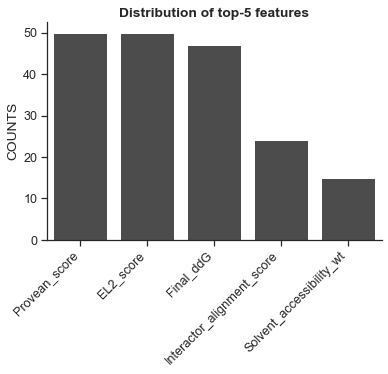

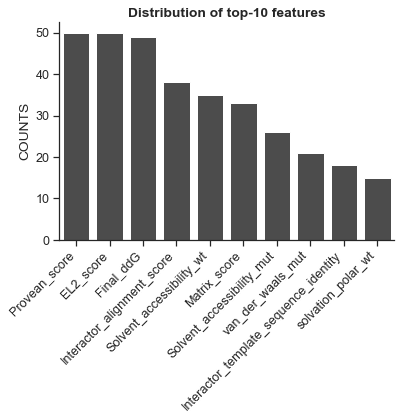

In [29]:
from helpers.helpers_predator.visualizers import visualize_distribution_top_n_features

visualize_distribution_top_n_features(predator.shap_feature_selector, 5)
visualize_distribution_top_n_features(predator.shap_feature_selector, 10)  # available for each shap_top_ns.

In [30]:
predator.shap_feature_selector.n_features_to_aggregated_features[10]

['Provean_score',
 'EL2_score',
 'Final_ddG',
 'Interactor_alignment_score',
 'Solvent_accessibility_wt',
 'Matrix_score',
 'Solvent_accessibility_mut',
 'van_der_waals_mut',
 'Interactor_template_sequence_identity',
 'solvation_polar_wt']

In [31]:
predator.shap_feature_selector.display_rankings(10, extract=True)

2021-10-23 20:55:40 | DEBUG    | helpers.helpers_predator.feature_selection | Displaying rankings ..
2021-10-23 20:55:40 | DEBUG    | helpers.helpers_predator.feature_selection | Extracting rankings ..
2021-10-23 20:55:40 | INFO     | helpers.helpers_predator.feature_selection | Rankings are extracted to file rankings_10.csv.


,0,1,2,3,4,5,6,7,8,9
0,Final_ddG,Provean_score,EL2_score,Solvent_accessibility_mut,Interactor_alignment_score,entropy_mainchain_wt,Solvent_accessibility_wt,Matrix_score,pcv_vdW_self_wt,entropy_sidechain_mut
1,Provean_score,Final_ddG,Solvent_accessibility_mut,EL2_score,Interactor_alignment_score,pcv_vdW_self_wt,Solvent_accessibility_wt,sidechain_hbond_mut,Interface_contact_distance_mut,electrostatics_mut
2,Provean_score,EL2_score,Solvent_accessibility_wt,Final_ddG,Matrix_score,Interactor_alignment_score,solvation_polar_wt,Solvent_accessibility_mut,Interactor_template_sequence_identity,solvation_polar_mut
3,EL2_score,Provean_score,Final_ddG,ProteinSolver_score,Interactor_alignment_score,Solvent_accessibility_wt,van_der_waals_mut,entropy_sidechain_wt,Model/DOPE_score,Matrix_score
4,EL2_score,Final_ddG,solvation_polar_wt,Provean_score,solvation_polar_mut,Solvent_accessibility_wt,Matrix_score,van_der_waals_mut,Solvent_accessibility_mut,backbone_clash_mut


In [32]:
predator.shap_feature_selector.n_features_to_aggregated_features

{5: ['Provean_score',
  'EL2_score',
  'Final_ddG',
  'Interactor_alignment_score',
  'Solvent_accessibility_wt'],
 10: ['Provean_score',
  'EL2_score',
  'Final_ddG',
  'Interactor_alignment_score',
  'Solvent_accessibility_wt',
  'Matrix_score',
  'Solvent_accessibility_mut',
  'van_der_waals_mut',
  'Interactor_template_sequence_identity',
  'solvation_polar_wt'],
 20: ['Final_ddG',
  'Provean_score',
  'EL2_score',
  'Interactor_alignment_score',
  'Solvent_accessibility_wt',
  'Matrix_score',
  'van_der_waals_mut',
  'Solvent_accessibility_mut',
  'Interactor_template_sequence_identity',
  'solvation_polar_wt',
  'solvation_polar_mut',
  'Model/DOPE_score',
  'electrostatics_mut',
  'Interface_contact_distance_wt',
  'entropy_sidechain_mut',
  'Interface_contact_distance_mut',
  'ProteinSolver_score',
  'ProtBert_score',
  'entropy_mainchain_wt',
  'pcv_vdW_self_wt'],
 30: ['Final_ddG',
  'Provean_score',
  'EL2_score',
  'Solvent_accessibility_wt',
  'Matrix_score',
  'Interactor

In [33]:
predator.shap_feature_selector.n_features_to_aggregated_features[10]

['Provean_score',
 'EL2_score',
 'Final_ddG',
 'Interactor_alignment_score',
 'Solvent_accessibility_wt',
 'Matrix_score',
 'Solvent_accessibility_mut',
 'van_der_waals_mut',
 'Interactor_template_sequence_identity',
 'solvation_polar_wt']

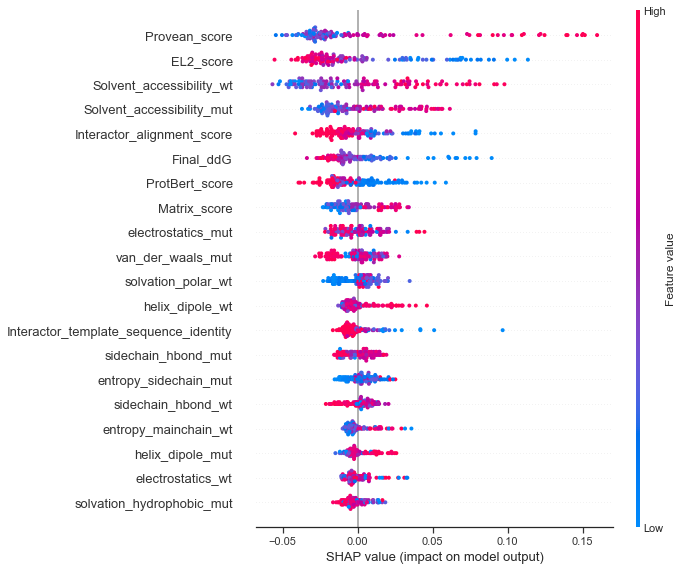

In [34]:
# TODO: convert a function in predator.py
import shap

shap.summary_plot(predator.shap_feature_selector.shap_values_train_list[38][1], 
                  predator.data_materials["Xs_train"][38])

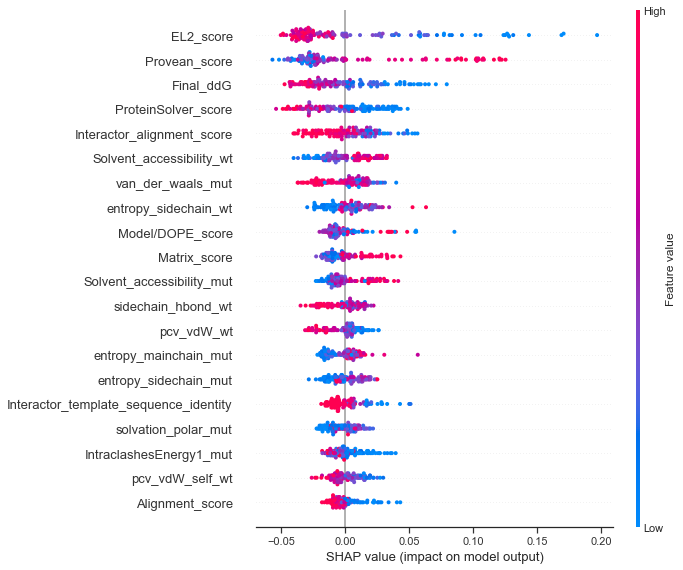

In [35]:
shap.summary_plot(predator.shap_feature_selector.shap_values_train_list[3][1], 
                  predator.data_materials["Xs_train"][3])

## Evaluation Metrics

In [36]:
from helpers.helpers_predator.evaluation import evaluate_metrics

In [37]:
predator.initialize_evaluation_metrics()

2021-10-23 20:55:54 | INFO     | helpers.helpers_predator.evaluation | Initializing EvaluationMetrics..
2021-10-23 20:55:54 | INFO     | helpers.helpers_predator.evaluation | Initialize_benchmark_dataframes ..


<div class="alert alert-block" style="background-color: white; border: 2px solid; padding: 10px; border-color: #F57C00">
    <b style="color: #F57C00"><i class="fa fa-warning" aria-hidden="true"></i>&nbsp; Warning</b><br>
<div>
    
Evaluation will take a long time.

In [ ]:
raise

In [38]:
predator.eval_metrics.run_eval_metrics(
    n_repeats=5,
    n_jobs=5,
    verbose=True
)

2021-10-23 20:55:57 | INFO     | helpers.helpers_predator.evaluation | Running evaluation metrics ..


  0%|          | 0/50 [00:00<?, ?it/s]


EVALUATION METRIC: F1
------------------------------------
X_train_exp_0_provean       : 0.3957
X_train_exp_0_ddG           : 0.2854
X_train_exp_0               : 0.4969
X_train_exp_0_shap_5        : 0.5704
X_train_exp_0_shap_10       : 0.641
X_train_exp_0_shap_20       : 0.5965
X_train_exp_0_shap_30       : 0.5667
X_train_exp_0_shap_40       : 0.5006

EVALUATION METRIC: BALANCED_ACCURACY
------------------------------------
X_train_exp_0_provean       : 0.521
X_train_exp_0_ddG           : 0.4745
X_train_exp_0               : 0.6732
X_train_exp_0_shap_5        : 0.6683
X_train_exp_0_shap_10       : 0.7276
X_train_exp_0_shap_20       : 0.699
X_train_exp_0_shap_30       : 0.702
X_train_exp_0_shap_40       : 0.6654

EVALUATION METRIC: ACCURACY
------------------------------------
X_train_exp_0_provean       : 0.5674
X_train_exp_0_ddG           : 0.5174
X_train_exp_0               : 0.7134
X_train_exp_0_shap_5        : 0.7274
X_train_exp_0_shap_10       : 0.7589
X_train_exp_0_shap_20     

In [39]:
predator.eval_metrics.scoring_metrics_data

,Provean,$\Delta\Delta$G,All Columns,SHAP Columns (5),SHAP Columns (10),SHAP Columns (20),SHAP Columns (30),SHAP Columns (40)
METRIC,,,,,,,,
ACCURACY,0.618978,0.584350,0.715106,0.714502,0.730738,0.730186,0.725688,0.720786
BALANCED_ACCURACY,0.591606,0.547086,0.653518,0.667906,0.683286,0.671928,0.667908,0.657876
F1,0.471066,0.405558,0.490624,0.535078,0.557550,0.537138,0.528764,0.505440
F1_MACRO,0.580356,0.535936,0.645164,0.661878,0.682366,0.667376,0.663596,0.656548
F1_MICRO,0.618828,0.584112,0.716668,0.714334,0.731820,0.728292,0.724788,0.721292
MCC,0.186948,0.102620,0.353610,0.364586,0.394848,0.390324,0.374264,0.368740
PRECISION,0.483546,0.425106,0.673646,0.652214,0.685924,0.690842,0.688660,0.679926
PRECISION_MACRO,0.594566,0.550850,0.705402,0.698538,0.721526,0.717536,0.717306,0.710620
PRECISION_MICRO,0.619898,0.584614,0.716386,0.716922,0.733070,0.726882,0.726092,0.719582


|                   |  Provean |      $\Delta\Delta$G | All Columns | SHAP Columns (5) | SHAP Columns (10) | SHAP Columns (20) | SHAP Columns (30) | SHAP Columns (40) |
|------------------:|---------:|---------:|------------:|-----------------:|------------------:|------------------:|------------------:|------------------:|
|          **accuracy** | 0.610760 | 0.593208 |    0.714452 |         0.709600 |          0.731082 |          0.730880 |          0.723732 |          0.721166 |
| **balanced_accuracy** | 0.581348 | 0.553346 |    0.646770 |         0.658926 |          0.684346 |          0.680468 |          0.667830 |          0.660290 |
|                **f1** | 0.457686 | 0.419508 |    0.488514 |         0.524742 |          0.548794 |          0.547668 |          0.527700 |          0.505250 |
|          **f1_macro** | 0.571148 | 0.546018 |    0.636866 |         0.660598 |          0.679270 |          0.676998 |          0.659292 |          0.654624 |
|          **f1_micro** | 0.614980 | 0.589080 |    0.711412 |         0.717540 |          0.732424 |          0.733220 |          0.726720 |          0.721122 |
|         **precision** | 0.474758 | 0.432868 |    0.671394 |         0.652346 |          0.688832 |          0.693074 |          0.673812 |          0.669226 |
|   **precision_macro** | 0.595020 | 0.560870 |    0.696782 |         0.703838 |          0.721984 |          0.737650 |          0.722108 |          0.710566 |
|   **precision_micro** | 0.612284 | 0.595524 |    0.713366 |         0.715992 |          0.734674 |          0.735460 |          0.726382 |          0.720640 |
|            **recall** | 0.479600 | 0.428800 |    0.414700 |         0.494300 |          0.506600 |          0.485700 |          0.469800 |          0.429400 |
|           **roc_auc** | 0.636772 | 0.609460 |    0.738156 |         0.745736 |          0.763738 |          0.762828 |          0.758032 |          0.752386 |

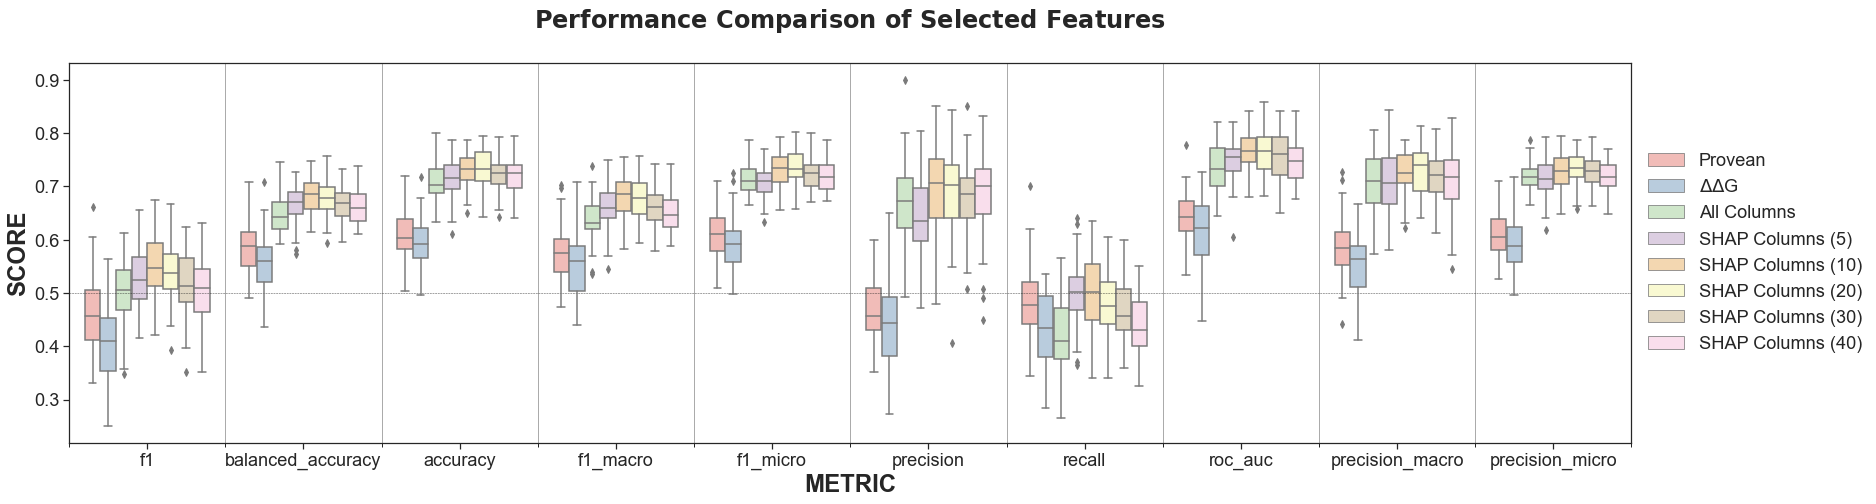

In [33]:
predator.eval_metrics.plot_performance_comparison_results()

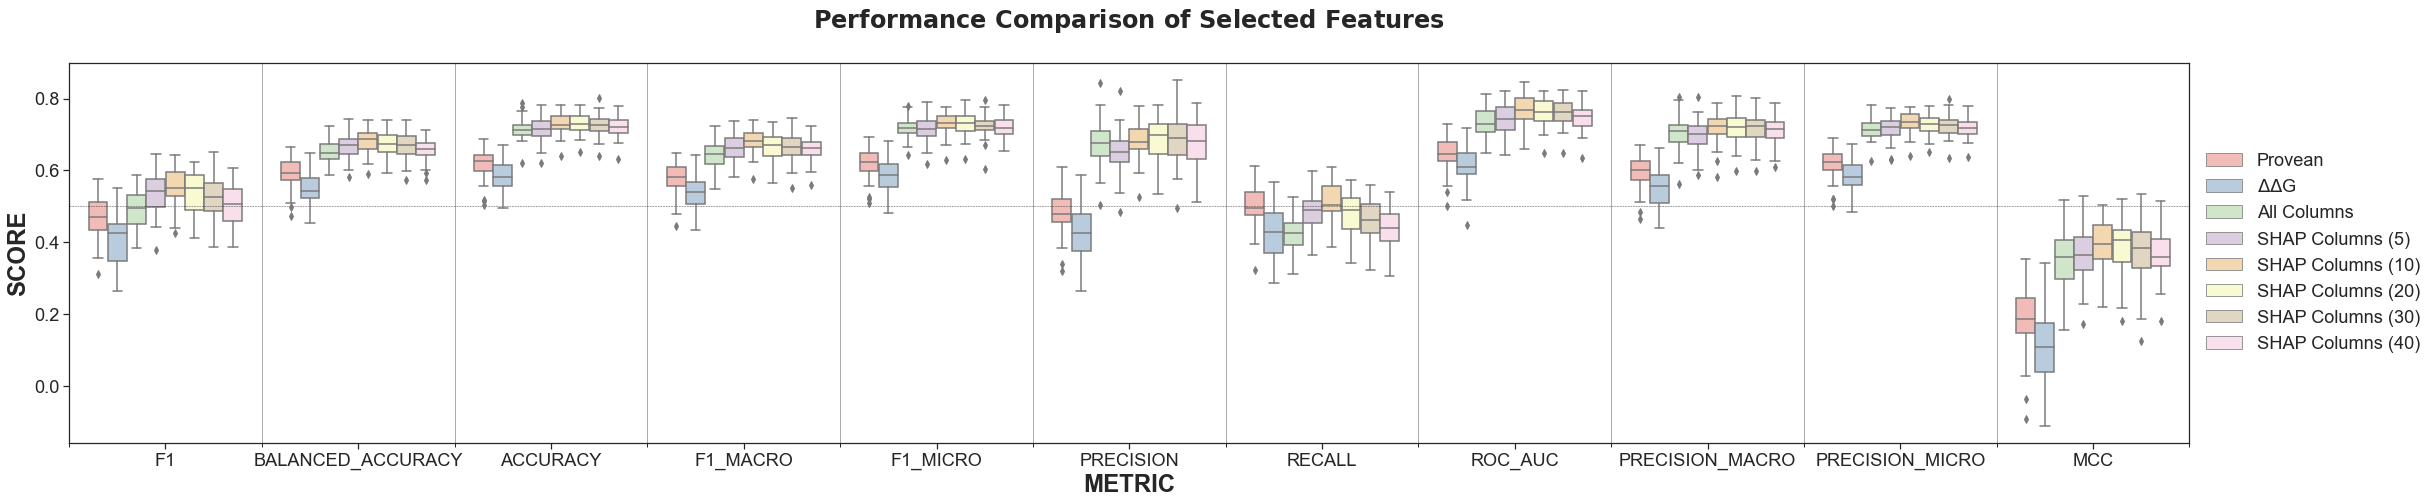

In [40]:
predator.eval_metrics.plot_performance_comparison_results()

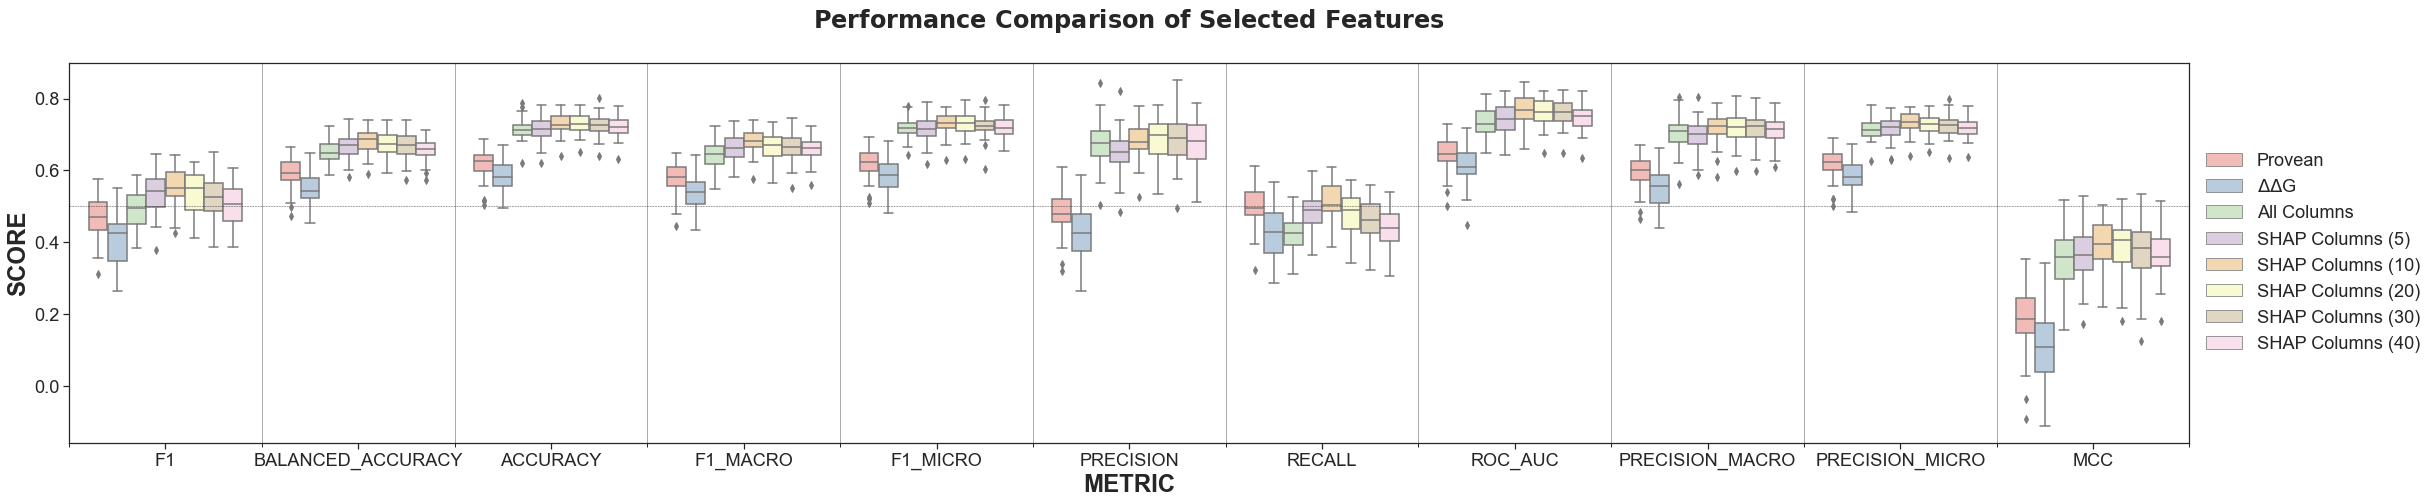

In [40]:
predator.eval_metrics.plot_performance_comparison_results()

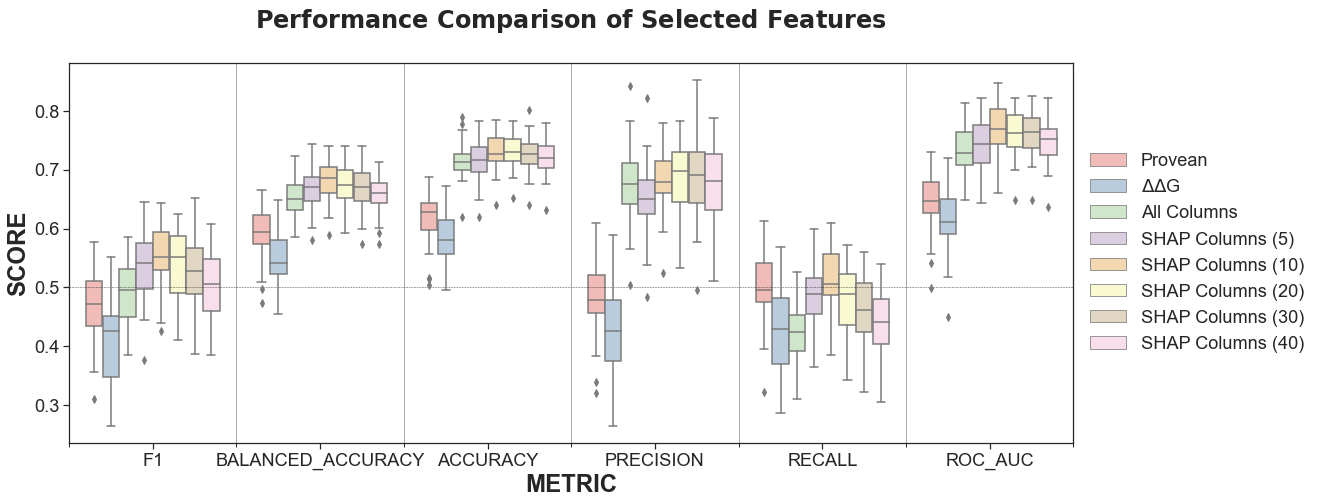

In [44]:
metrics = ["F1", "BALANCED_ACCURACY", "ACCURACY", "PRECISION", "RECALL", "ROC_AUC"]
predator.eval_metrics.plot_performance_comparison_results(metrics)
# last remained here: 23th oct night. -- this cell is almost completed (maybe squeeze the width a bit.)

## Fine Tuning

Fine Tuning on 80% of data (training *set*)

In [45]:
determined_feature_set = "shap_10"
predator.set_determined_feature_set(determined_feature_set)

2021-10-24 10:12:01 | DEBUG    | Predator | Setting determined feature set to `shap_10`.
2021-10-24 10:12:01 | DEBUG    | Predator | Setting determined features to 
['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt'].


In [46]:
predator.run_hyperparameter_search(
    n_iter=100,
    n_repeats_cv=3,
    n_jobs=6,
    verbose=0,
    search_type="randomized",
    param_grid_level=1
)

2021-10-24 10:13:58 | DEBUG    | helpers.helpers_predator.fine_tuning | Running randomized search for each experiment ..
2021-10-24 10:13:58 | DEBUG    | helpers.helpers_predator.fine_tuning | PARAM_GRID: {'bootstrap': [True, False], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, None], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600], 'min_samples_split': [2, 5], 'max_features': ['auto', 'sqrt', None], 'class_weight': ['balanced', None]}


  0%|          | 0/50 [00:00<?, ?it/s]

In [47]:
predator.fine_tuner.classifiers_attributes_data.head()

,best_params_,best_estimator_,best_score_
EXP_1,"{'n_estimators': 580, 'min_samples_split': 2, ...","(DecisionTreeClassifier(max_depth=9, max_featu...",0.715509
EXP_2,"{'n_estimators': 600, 'min_samples_split': 2, ...","(DecisionTreeClassifier(max_depth=4, max_featu...",0.711991
EXP_3,"{'n_estimators': 480, 'min_samples_split': 2, ...","(DecisionTreeClassifier(max_depth=8, min_sampl...",0.780787
EXP_4,"{'n_estimators': 60, 'min_samples_split': 5, '...","(DecisionTreeClassifier(max_depth=5, max_featu...",0.736713
EXP_5,"{'n_estimators': 120, 'min_samples_split': 5, ...","(DecisionTreeClassifier(max_depth=11, max_feat...",0.678935


In [48]:
predator.fine_tuner.best_estimators[:5]

[RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=580,
                        random_state=83811),
 RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                        max_features='sqrt', n_estimators=600,
                        random_state=14593),
 RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                        min_samples_leaf=2, n_estimators=480, random_state=3279),
 RandomForestClassifier(class_weight='balanced', max_depth=5,
                        max_features='sqrt', min_samples_split=5,
                        n_estimators=60, random_state=97197),
 RandomForestClassifier(class_weight='balanced', max_depth=11,
                        min_samples_split=5, n_estimators=120,
                        random_state=36049)]

In [49]:
len(predator.tuned_models)

50

In [50]:
predator.tuned_models[:5]

[RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=580,
                        random_state=83811),
 RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                        max_features='sqrt', n_estimators=600,
                        random_state=14593),
 RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                        min_samples_leaf=2, n_estimators=480, random_state=3279),
 RandomForestClassifier(class_weight='balanced', max_depth=5,
                        max_features='sqrt', min_samples_split=5,
                        n_estimators=60, random_state=97197),
 RandomForestClassifier(class_weight='balanced', max_depth=11,
                        min_samples_split=5, n_estimators=120,
                        random_state=36049)]

In [51]:
predator.fine_tuner.best_estimators[:5] == predator.tuned_models[:5]

True

In [52]:
predator.default_models[0]

RandomForestClassifier(random_state=42)

In [53]:
len(predator.tuned_models)

50

In [54]:
predator.tuned_models[0]

RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=580,
                       random_state=83811)

In [55]:
predator.tuned_models[1]

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)

## Performance of Tuned Models on (out of sample) Validation Data

For each experiment, the **hyper-tuned** models are fitted with 80% of training data and predictions are made for the remaining 20%. Then performance is evaluated comparing predictions with groundtruth labels.

In [56]:
predator.run_evaluate_valid(models_type='feature_selected')

2021-10-24 17:10:29 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2021-10-24 17:10:29 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with default models using determined features.
2021-10-24 17:10:29 | DEBUG    | helpers.helpers_predator.evaluation | Determined features: 
['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7576
Balanced accuracy score : 0.6845
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6905
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7879
Balanced accuracy score : 0.7440
-------- EXPERIMENT:  4 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7273
Balanced accuracy score : 0.6591
-------- EXPERIMENT:  5 --------
X_train.shape=(131, 10), y_trai

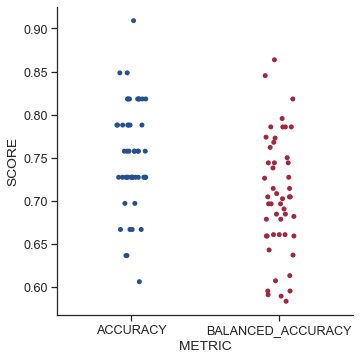

In [57]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["feature_selected_scoring"]["acc_scores"], 
    predator.eval_valid.scores["feature_selected_scoring"]["balan_acc_scores"],
    kind='strip'
)

In [58]:
predator.run_evaluate_valid(models_type='tuned')

2021-10-24 17:10:41 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2021-10-24 17:10:41 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with tuned models.
2021-10-24 17:10:41 | DEBUG    | helpers.helpers_predator.evaluation | Determined features: 
['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=580,
                       random_state=83811)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6190
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
Accuracy score		: 0.6970
Balanced accuracy score : 0.7083
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2, n_estimators=480, random_state=3279)
Accuracy score		: 0.787

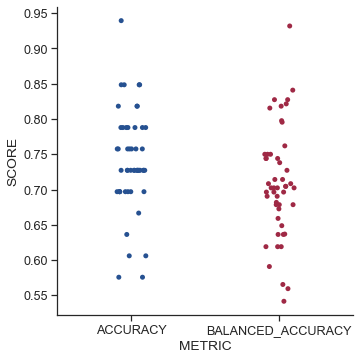

In [59]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["finalized_scoring"]["acc_scores"], 
    predator.eval_valid.scores["finalized_scoring"]["balan_acc_scores"],
    kind='strip'
)

,Experiment,Acc_scores,Balan_acc_scores,Models_type
0,0,0.696970,0.619048,Tuned+FeatureSelected
1,1,0.696970,0.708333,Tuned+FeatureSelected
2,2,0.787879,0.761905,Tuned+FeatureSelected
3,3,0.727273,0.659091,Tuned+FeatureSelected
4,4,0.727273,0.681818,Tuned+FeatureSelected
5,5,0.666667,0.648810,Tuned+FeatureSelected
6,6,0.575758,0.559524,Tuned+FeatureSelected
7,7,0.727273,0.714286,Tuned+FeatureSelected
8,8,0.848485,0.840909,Tuned+FeatureSelected
9,9,0.727273,0.696429,Tuned+FeatureSelected


       Experiment  Acc_scores  Balan_acc_scores
count    50.00000   50.000000         50.000000
mean     24.50000    0.740606          0.708831
std      14.57738    0.070911          0.077763
min       0.00000    0.575758          0.541667
25%      12.25000    0.696970          0.674107
50%      24.50000    0.727273          0.702381
75%      36.75000    0.787879          0.748512
max      49.00000    0.939394          0.931818
2021-10-24 17:39:18 | INFO     | helpers.helpers_predator.evaluation | balanced_acc_threshold: 0.674107142857143
2021-10-24 17:39:18 | INFO     | helpers.helpers_predator.evaluation | bad_models_ix: [0, 3, 5, 6, 17, 22, 24, 26, 29, 31, 34, 38, 40]
2021-10-24 17:39:18 | INFO     | helpers.helpers_predator.evaluation | qualified_models_ix: [1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 25, 27, 28, 30, 32, 33, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]
                                 Number of Model
Tuned+FeatureSelected               

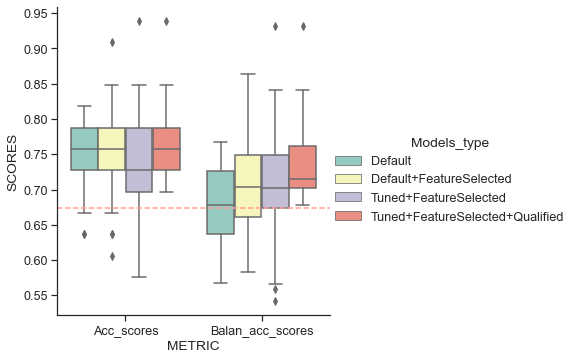

In [64]:
predator.compare_tuned_models(kind='box')

In [65]:
predator.eval_valid.comparison_data

Models_type,Default,Default+FeatureSelected,Tuned+FeatureSelected,Tuned+FeatureSelected+Qualified
Acc_scores,0.742424,0.751515,0.740606,0.767404
Balan_acc_scores,0.678117,0.705390,0.708831,0.741532


In [66]:
print(len(predator.default_models))
pprint(predator.default_models[:3])
print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  ')
print(len(predator.tuned_models))
pprint(predator.tuned_models[:3])
print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  ')
print(len(predator.qualified_models))
pprint(predator.qualified_models[:3])

50
[RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42)]
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
50
[RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=580,
                       random_state=83811),
 RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593),
 RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2, n_estimators=480, random_state=3279)]
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
37
[RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593),
 RandomForestClassifier(bootstrap=False, max_depth=

In [67]:
print(len(predator.qualified_models))
predator.qualified_models == predator.eval_valid.qualified_models

37


True

## Fit Finalized Models

For each experiment, the **hyper-tuned** models are fitted with **all of training** data. These models then will be used to make prediction on TCGA Cancer Datasets.

In [68]:
predator.fit_finalized_models()

2021-10-24 17:41:35 | DEBUG    | Predator | Fitting finalized models with all training data ..
2021-10-24 17:41:35 | INFO     | Predator | Model elimination: True
2021-10-24 17:41:35 | INFO     | Predator | Using 37 qualified models as finalized models.


  0%|          | 0/37 [00:00<?, ?it/s]

In [69]:
print(predator.n_experiment)
print(predator.n_models)

50
37


In [70]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'sampled_train_data_list', 'prepared_dataframes', 'label_proportions_dataframes', 'Xs', 'ys', 'Xs_train', 'ys_train', 'Xs_valid', 'ys_valid', 'Xs_train_random', 'ys_train_random', 'Xs_valid_random', 'ys_valid_random', 'Xs_shap_5', 'Xs_train_shap_5', 'Xs_valid_shap_5', 'Xs_provean', 'Xs_train_provean', 'Xs_ddG', 'Xs_train_ddG', 'Xs_shap_10', 'Xs_train_shap_10', 'Xs_valid_shap_10', 'Xs_shap_20', 'Xs_train_shap_20', 'Xs_valid_shap_20', 'Xs_shap_30', 'Xs_train_shap_30', 'Xs_valid_shap_30', 'Xs_shap_40', 'Xs_train_shap_40', 'Xs_valid_shap_40'])

## Exporting Model

In [71]:
from helpers.helpers_predator.common import export_serialized_predator

In [72]:
export_serialized_predator(predator)

2021-10-24 17:42:04 | DEBUG    | helpers.helpers_predator.common | Folder with ID 04f37897 is created.
2021-10-24 17:42:04 | DEBUG    | helpers.helpers_predator.common | Exporting Predator at location PredatorModels in folder PredatorModel_2021-10-24\04f37897..
2021-10-24 17:42:06 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-24\04f37897\predator.pkl is exported.
2021-10-24 17:42:06 | INFO     | helpers.helpers_predator.common | Config is exported.


## Loading the model

In [73]:
from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import compare_predator_objects

In [74]:
PREDATOR_PATH = "PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl"

In [75]:
predator_loaded = load_predator(PREDATOR_PATH)

2021-10-24 17:42:39 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl is loaded successfully.


In [76]:
compare_predator_objects(predator, predator_loaded)

2021-10-24 17:42:39 | DEBUG    | helpers.helpers_predator.common | Checking attribute n_experiment ..
2021-10-24 17:42:39 | DEBUG    | helpers.helpers_predator.common | Checking attribute n_models ..
2021-10-24 17:42:39 | DEBUG    | helpers.helpers_predator.common | Checking attribute random_seeds ..
2021-10-24 17:42:39 | DEBUG    | helpers.helpers_predator.common | Checking attribute paths ..
2021-10-24 17:42:39 | DEBUG    | helpers.helpers_predator.common | Checking attribute tcga_cohorts ..
2021-10-24 17:42:39 | DEBUG    | helpers.helpers_predator.common | Checking attribute data_materials ..
2021-10-24 17:42:40 | DEBUG    | helpers.helpers_predator.common | Checking attribute default_models ..
2021-10-24 17:42:40 | DEBUG    | helpers.helpers_predator.common | Checking attribute tuned_models ..
2021-10-24 17:42:40 | DEBUG    | helpers.helpers_predator.common | Checking attribute finalized_models ..
2021-10-24 17:42:40 | DEBUG    | helpers.helpers_predator.common | Checking attribute

---

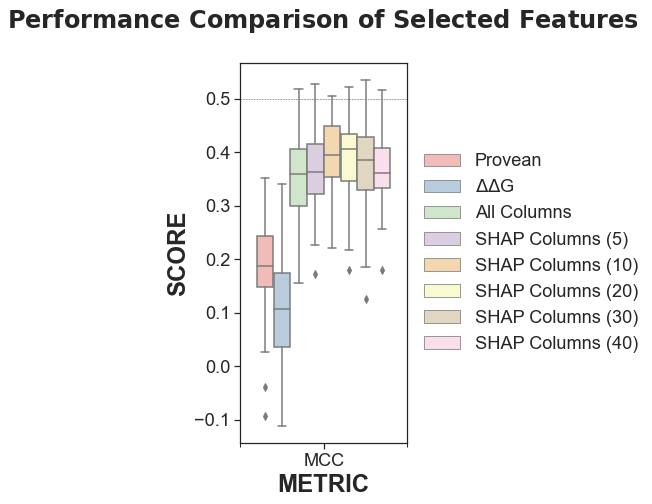

In [77]:
predator.eval_metrics.plot_performance_comparison_results(["MCC"])

In [78]:
predator.data_materials["train_data_processed"].columns.to_list()

['Mutation_Effect_Label',
 'UniProt_ID',
 'Mutation',
 'Interactor_UniProt_ID',
 'Template_sequence_identity',
 'Alignment_score',
 'Interactor_template_sequence_identity',
 'Interactor_alignment_score',
 'Final_ddG',
 'ProtBert_score',
 'ProteinSolver_score',
 'EL2_score',
 'Model/DOPE_score',
 'Provean_score',
 'Matrix_score',
 'Solvent_accessibility_wt',
 'Solvent_accessibility_mut',
 'pcv_vdW_wt',
 'pcv_vdW_mut',
 'pcv_vdW_self_wt',
 'pcv_vdW_self_mut',
 'dg_wt',
 'backbone_hbond_wt',
 'sidechain_hbond_wt',
 'van_der_waals_wt',
 'electrostatics_wt',
 'solvation_polar_wt',
 'solvation_hydrophobic_wt',
 'van_der_waals_clashes_wt',
 'entropy_sidechain_wt',
 'entropy_mainchain_wt',
 'torsional_clash_wt',
 'backbone_clash_wt',
 'helix_dipole_wt',
 'electrostatic_kon_wt',
 'energy_ionisation_wt',
 'number_of_residues_wt',
 'dg_mut',
 'backbone_hbond_mut',
 'sidechain_hbond_mut',
 'van_der_waals_mut',
 'electrostatics_mut',
 'solvation_polar_mut',
 'solvation_hydrophobic_mut',
 'van_der_w